### Deliverable 1: Preprocessing the Data for a Neural Network

In [36]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [37]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#application_df = application_df.drop(['EIN', 'NAME'], axis=1).values
application_df = application_df.drop(columns=["EIN","NAME"])
application_df.tail()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


In [38]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [39]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

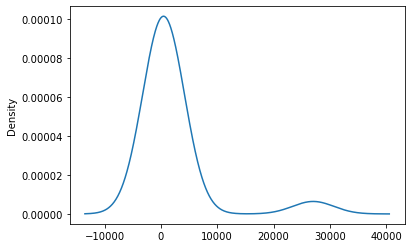

In [40]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [41]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 150].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [42]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
pd.set_option('display.max_rows', 20)
print(classification_counts)


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1245        1
C1732        1
C2561        1
C2500        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64


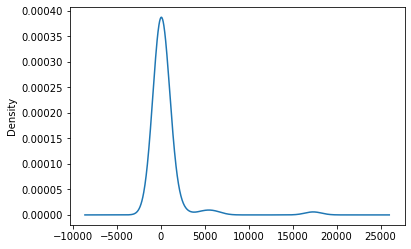

In [43]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [44]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [45]:
# Generate our categorical variable lists
application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

In [46]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
#MODEL 1 Optimization: update output layer to softmax

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
    
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Check the structure of the model
nn.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3680      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,141
Trainable params: 6,141
Non-trainable params: 0
_________________________________________________________________


In [20]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 86us/sample - loss: 7.1695 - acc: 0.5324
Epoch 2/100
25724/25724 [==============================] - 2s 74us/sample - loss: 7.1695 - acc: 0.5324
Epoch 3/100
25724/25724 [==============================] - 2s 75us/sample - loss: 7.1695 - acc: 0.5324
Epoch 4/100
25724/25724 [==============================] - 2s 75us/sample - loss: 7.1695 - acc: 0.5324
Epoch 5/100
25312/25724 [============================>.] - ETA: 0s - loss: 7.1675 - acc: 0.5326
Epoch 00005: saving model to checkpoints1/weights.05.hdf5
25724/25724 [==============================] - 2s 77us/sample - loss: 7.1695 - acc: 0.5324
Epoch 6/100
25724/25724 [==============================] - 2s 71us/sample - loss: 7.1695 - acc: 0.5324
Epoch 7/100
25724/25724 [==============================] - 2s 74us/sample - loss: 7.1695 - acc: 0.5324
Epoch 8/100
25724/25724 [==============================] - 2s 85us/sample - loss: 7.1695 - acc: 0.5324
Epoch 9/100

Epoch 63/100
25724/25724 [==============================] - 2s 65us/sample - loss: 7.1695 - acc: 0.5324
Epoch 64/100
25724/25724 [==============================] - 2s 64us/sample - loss: 7.1695 - acc: 0.5324
Epoch 65/100
25216/25724 [============================>.] - ETA: 0s - loss: 7.1692 - acc: 0.5324
Epoch 00065: saving model to checkpoints1/weights.65.hdf5
25724/25724 [==============================] - 2s 62us/sample - loss: 7.1695 - acc: 0.5324
Epoch 66/100
25724/25724 [==============================] - 2s 62us/sample - loss: 7.1695 - acc: 0.5324
Epoch 67/100
25724/25724 [==============================] - 2s 66us/sample - loss: 7.1695 - acc: 0.5324
Epoch 68/100
25724/25724 [==============================] - 2s 63us/sample - loss: 7.1695 - acc: 0.5324
Epoch 69/100
25724/25724 [==============================] - 2s 64us/sample - loss: 7.1695 - acc: 0.53241
Epoch 70/100
25408/25724 [============================>.] - ETA: 0s - loss: 7.1621 - acc: 0.5329
Epoch 00070: saving model to che

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 7.1311 - acc: 0.5324
Loss: 7.131130857829103, Accuracy: 0.5323615074157715


In [24]:
#export model
nn.save("AlphabetSoupCharity_softmax.h5")

In [ ]:
#Try #3 remove columns using a correlation matrix to determine which to remove.


In [48]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
app_matrix = application_df[["IS_SUCCESSFUL", "STATUS", "ASK_AMT", "APPLICATION_TYPE_T10", "APPLICATION_TYPE_T19", "APPLICATION_TYPE_T3", "APPLICATION_TYPE_T4", "APPLICATION_TYPE_T7", "APPLICATION_TYPE_T8", "APPLICATION_TYPE_T9"]]
app_matrix.head()

,IS_SUCCESSFUL,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9
0,1,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,108590,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,6692,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,142590,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
app_matrix.corr()

,IS_SUCCESSFUL,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9
IS_SUCCESSFUL,1.000000,-0.001636,-0.010861,0.086805,-0.123303,-0.000953,-0.098692,0.009752,-0.032796,0.025136
STATUS,-0.001636,1.000000,0.000383,0.001510,0.002162,-0.006258,0.002620,0.001774,0.001789,0.000816
ASK_AMT,-0.010861,0.000383,1.000000,-0.003925,-0.005657,0.012899,-0.006774,-0.004434,-0.004655,0.008981
APPLICATION_TYPE_T10,0.086805,0.001510,-0.003925,1.000000,-0.022384,-0.241266,-0.027129,-0.018374,-0.018529,-0.008452
APPLICATION_TYPE_T19,-0.123303,0.002162,-0.005657,-0.022384,1.000000,-0.345410,-0.038839,-0.026306,-0.026527,-0.012100
APPLICATION_TYPE_T3,-0.000953,-0.006258,0.012899,-0.241266,-0.345410,1.000000,-0.418641,-0.283543,-0.285931,-0.130426
APPLICATION_TYPE_T4,-0.098692,0.002620,-0.006774,-0.027129,-0.038839,-0.418641,1.000000,-0.031883,-0.032151,-0.014666
APPLICATION_TYPE_T7,0.009752,0.001774,-0.004434,-0.018374,-0.026306,-0.283543,-0.031883,1.000000,-0.021776,-0.009933
APPLICATION_TYPE_T8,-0.032796,0.001789,-0.004655,-0.018529,-0.026527,-0.285931,-0.032151,-0.021776,1.000000,-0.010017
APPLICATION_TYPE_T9,0.025136,0.000816,0.008981,-0.008452,-0.012100,-0.130426,-0.014666,-0.009933,-0.010017,1.000000


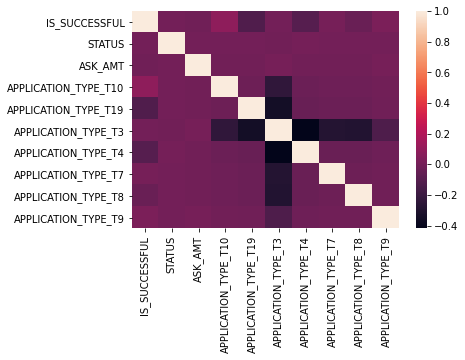

In [51]:
sns.heatmap(app_matrix.corr())

In [69]:
newapplication_df = application_df.drop(columns=["STATUS", "ASK_AMT"])
newapplication_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
y = newapplication_df.IS_SUCCESSFUL
X = newapplication_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [71]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
#in experiment 2 and 3, the hidden nodes were 80 and 30 respectively
#experiment #4 layer 1 - 160 and layer 2 - 70

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
    
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [58]:
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# os.makedirs("checkpoints3/",exist_ok=True)
# checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"


In [72]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     period=5)

In [73]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 9s 333us/sample - loss: 0.5694 - acc: 0.7209
Epoch 2/100
25724/25724 [==============================] - 8s 306us/sample - loss: 0.5528 - acc: 0.7299s - loss: 0.5528 - acc: 0
Epoch 3/100
25724/25724 [==============================] - 12s 452us/sample - loss: 0.5504 - acc: 0.7328s - loss: - ETA: 1s - lo
Epoch 4/100
25724/25724 [==============================] - 8s 313us/sample - loss: 0.5479 - acc: 0.7332
Epoch 5/100
25724/25724 [==============================] - 8s 321us/sample - loss: 0.5471 - acc: 0.7341
Epoch 6/100
25724/25724 [==============================] - 8s 326us/sample - loss: 0.5462 - acc: 0.7347
Epoch 7/100
25724/25724 [==============================] - 7s 287us/sample - loss: 0.5452 - acc: 0.7358
Epoch 8/100
25724/25724 [==============================] - 9s 348us/sample - loss: 0.5442 - acc: 0.7360
Epoch 9/100
25724/25724 [==============================] - 9s 336us/sample - loss: 0.5436 - acc

Epoch 75/100
25724/25724 [==============================] - 3s 102us/sample - loss: 0.5343 - acc: 0.7418
Epoch 76/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5346 - acc: 0.7413
Epoch 77/100
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5346 - acc: 0.7414
Epoch 78/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5344 - acc: 0.7402
Epoch 79/100
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5341 - acc: 0.7406
Epoch 80/100
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5344 - acc: 0.7413
Epoch 81/100
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5345 - acc: 0.7410
Epoch 82/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5343 - acc: 0.7412
Epoch 83/100
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5343 - acc: 0.7412
Epoch 84/100
25724/25724 [==============================] - 3s 

In [74]:
# Evaluate the model using the test data - removal of features
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 1s - loss: 0.5600 - acc: 0.7258
Loss: 0.5599657401816143, Accuracy: 0.7258309125900269


In [61]:
# Evaluate the model using the test data - increase neurons -
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5697 - acc: 0.7236
Loss: 0.5696618561633474, Accuracy: 0.7236151695251465


In [62]:
#export model
nn.save("AlphabetSoupCharity_increaseneurons.h5")

In [33]:
#Test#4Increase Neurons